In [1]:
import pandas as pd

In [25]:
import numpy as np

<h1>1.Data Example</h1>

In [6]:
df =pd.DataFrame(columns =['calory','breakfast','lunch','dinner','exercise','body_shape'])


In [17]:
df.loc[0]=[1200,1,0,1,2,'skinny']
df.loc[1]=[2800,1,1,2,1,'Normal']
df.loc[2]=[3500,2,3,1,0,'Fat']
df.loc[3]=[1400,0,2,0,1,'skinny']
df.loc[4]=[1200,1,1,0,2,'Normal']
df.loc[5]=[1500,2,1,2,0,'skinny']
df.loc[6]=[2300,3,0,3,2,'skinny']
df.loc[7]=[1250,0,1,1,1,'Fat']
df.loc[8]=[3000,2,2,1,1,'Normal']
df.loc[9]= [2500,2,1,0,2,'Fat']

In [8]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,1,2,skinny
1,2800,1,1,2,1,Normal
2,3500,2,3,1,0,Fat
3,1400,0,2,0,1,skinny
4,1200,1,1,0,2,Normal
5,1500,2,1,2,0,skinny
6,2300,3,0,3,2,skinny
7,1250,0,1,1,1,Fat
8,3000,2,2,1,1,Normal


<h1>Split feature vectors and labels</h1>

In [18]:
X  =df[['calory','breakfast','lunch','dinner','exercise']]
X.head(9)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,1,2
1,2800,1,1,2,1
2,3500,2,3,1,0
3,1400,0,2,0,1
4,1200,1,1,0,2
5,1500,2,1,2,0
6,2300,3,0,3,2
7,1250,0,1,1,1
8,3000,2,2,1,1


In [19]:
Y=df[['body_shape']]
Y.head(10)

,body_shape
0,skinny
1,Normal
2,Fat
3,skinny
4,Normal
5,skinny
6,skinny
7,Fat
8,Normal
9,Fat


<h1>Rescaling features vectors to all have the same scale</h1>

In [24]:
from sklearn.preprocessing import StandardScaler
X_std =StandardScaler().fit_transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<h1>4.Covariance Matrix of features</h1>

In [27]:
features=X_std.T
covariance_matrix =np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.62336104,  0.5896575 ,  0.25076663, -0.35166453],
       [ 0.62336104,  1.11111111, -0.11125026,  0.59112684,  0.03240066],
       [ 0.5896575 , -0.11125026,  1.11111111, -0.43232034, -0.74939253],
       [ 0.25076663,  0.59112684, -0.43232034,  1.11111111, -0.18886423],
       [-0.35166453,  0.03240066, -0.74939253, -0.18886423,  1.11111111]])

<h1>Eigen vectors and Eigen Values from Covariance Matrix</h1>

In [29]:
eig_value,eig_vec =np.linalg.eig(covariance_matrix)

In [31]:
print('Eigenvectors\n%s' %eig_vec)

Eigenvectors
[[-0.35590723  0.57567107  0.41245627 -0.59586495  0.12945135]
 [ 0.02725321 -0.68590471  0.31852724 -0.33672673  0.56031018]
 [ 0.69516245 -0.07044063  0.13395859 -0.4982147  -0.49560519]
 [ 0.43262902  0.33804925 -0.55516981 -0.18656272  0.59626812]
 [ 0.44963164  0.28088853  0.63424112  0.4985344   0.26102621]]


In [33]:
print('Eigenvalues\n%s' %eig_value)

Eigenvalues
[0.05109958 0.27190065 0.9057293  2.32913699 1.99768904]


In [34]:
eig_value[0]/sum(eig_value)

0.009197924410872119

<h1>6.Project data point onto selected EigenVector</h1>

In [39]:
projected_X =X_std.dot(eig_vec.T[0])
projected_X

array([-0.15616473, -0.19983721,  0.05954589,  0.26212786,  0.18265544,
       -0.2031568 ,  0.34004043, -0.01117804,  0.0813663 , -0.35539914])

In [45]:
result =pd.DataFrame(projected_X,columns=['PC1'])
result['y-axis']=0.0
result['label']=Y
result

,PC1,y-axis,label
0,-0.156165,0.0,skinny
1,-0.199837,0.0,Normal
2,0.059546,0.0,Fat
3,0.262128,0.0,skinny
4,0.182655,0.0,Normal
5,-0.203157,0.0,skinny
6,0.340040,0.0,skinny
7,-0.011178,0.0,Fat
8,0.081366,0.0,Normal
9,-0.355399,0.0,Fat


<h1>7.Plotting<h1>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'PCA result')

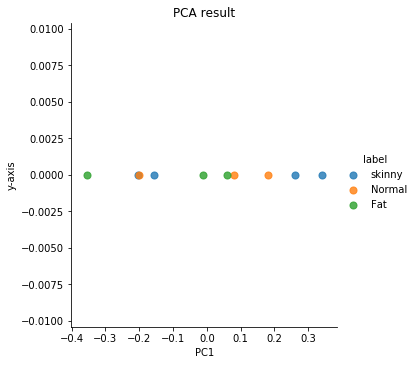

In [48]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={"s":50},hue ="label")
plt.title('PCA result')